In [2]:
pip install git+https://github.com/facebookresearch/segment-anything.git


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-k1ccsvwf
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-k1ccsvwf
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=312e469b3523eb530378ac68f9f66211dc9c288a589e5c506ae481b4039eb4af
  Stored in directory: /tmp/pip-ephem-wheel-cache-0xoi450w/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [3]:
pip install opencv-python pycocotools matplotlib onnxruntime onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 13.4 MB/s eta 0:00:00


In [4]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


--2024-04-29 11:01:48--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.102, 108.157.254.121, 108.157.254.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  45.3MB/s    in 15s     

2024-04-29 11:02:03 (168 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [5]:
import torch
import torchvision
import sys

!mkdir images


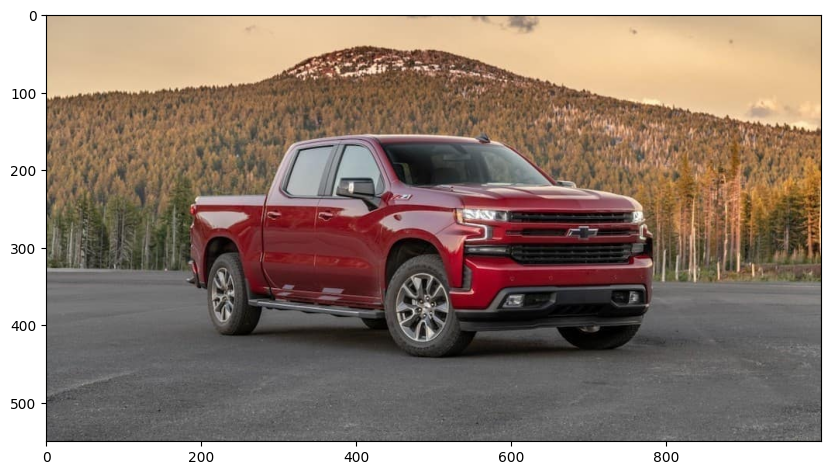

In [7]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('images/truck.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [8]:
from segment_anything import SamPredictor,sam_model_registry

In [9]:
sam = sam_model_registry['default'](checkpoint='sam_vit_h_4b8939.pth')
device = 'cpu'
sam.to(device=device)
predictor = SamPredictor(sam)

In [10]:
import numpy as np
input_point = np.array([[350,300]])
input_label = np.array([1])

In [11]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    print('mask.reshape',np.shape(mask.reshape(h, w, 1)))
    print('color.reshape',np.shape(color.reshape(1, 1, -1)))
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    print('mask_image',np.shape(mask_image))
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    print(pos_points[:,0])
    neg_points = coords[labels==0]
    print(neg_points)
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

[350]
[]


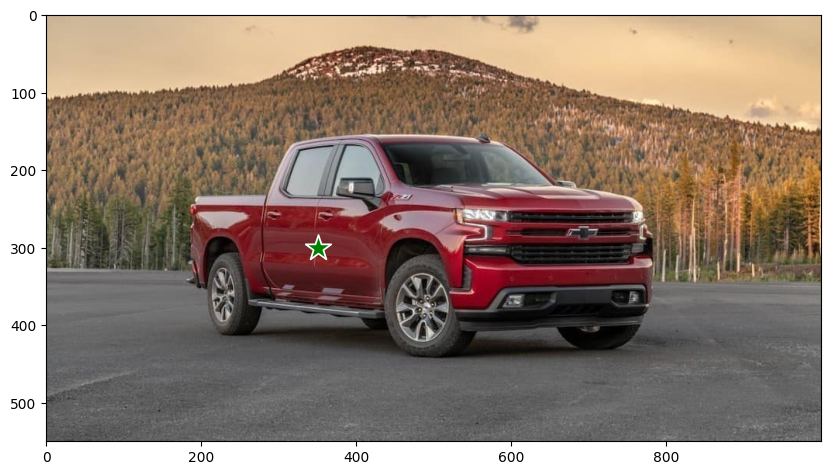

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [13]:
predictor.set_image(image)
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

In [14]:
masks

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [15]:
masks.shape

(3, 550, 1000)

mask.reshape (550, 1000, 1)
color.reshape (1, 1, 4)
mask_image (550, 1000, 4)
[350]
[]


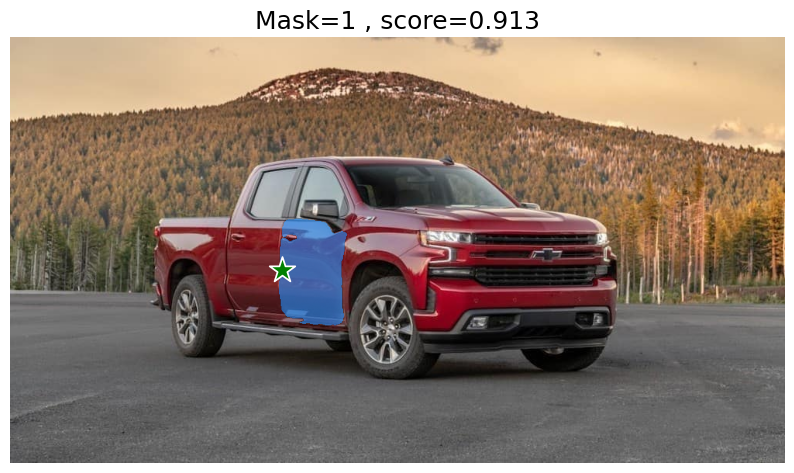

mask.reshape (550, 1000, 1)
color.reshape (1, 1, 4)
mask_image (550, 1000, 4)
[350]
[]


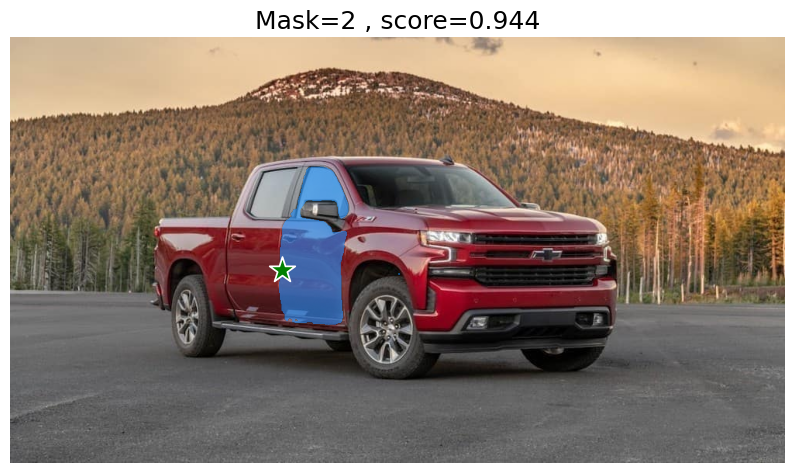

mask.reshape (550, 1000, 1)
color.reshape (1, 1, 4)
mask_image (550, 1000, 4)
[350]
[]


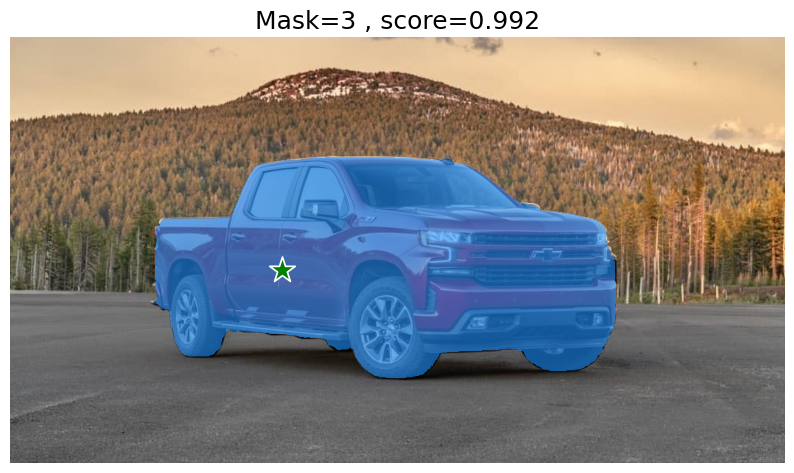

In [16]:
for i ,(mask,score) in enumerate(zip(masks,scores)):
  plt.figure(figsize=(10,10))
  plt.imshow(image)
  show_mask(mask,plt.gca())
  show_points(input_point,input_label,plt.gca())
  plt.title(f'Mask={i+1} , score={score:.3f}',fontsize=18)
  plt.axis('off')
  plt.show()

In [17]:
input_point = np.array([[350, 300], [220, 350]])
input_label = np.array([1, 0])

In [18]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

mask.reshape (550, 1000, 1)
color.reshape (1, 1, 4)
mask_image (550, 1000, 4)
[350]
[[220 350]]


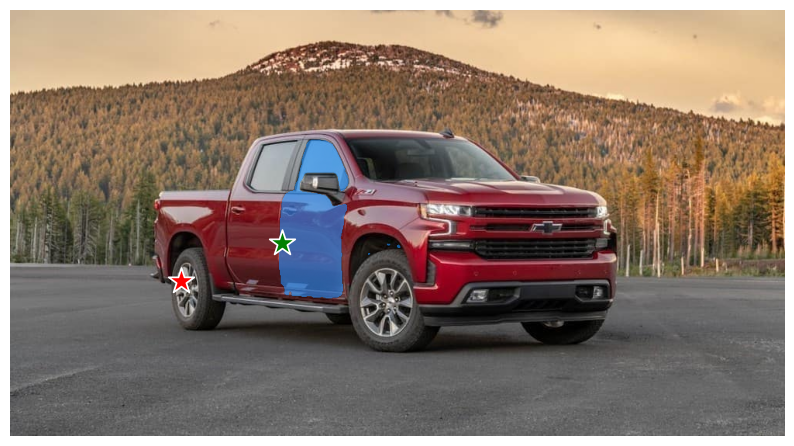

In [19]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()


In [20]:
input_box = np.array([420, 280, 550, 460])

In [21]:
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

mask.reshape (550, 1000, 1)
color.reshape (1, 1, 4)
mask_image (550, 1000, 4)


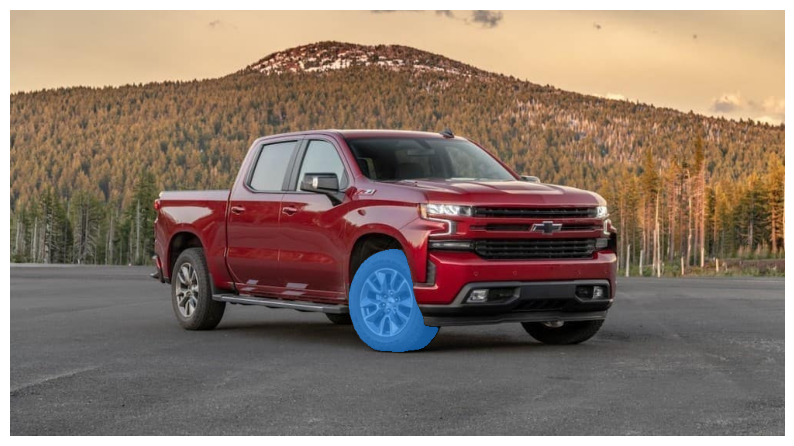

In [22]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks, plt.gca())
# show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

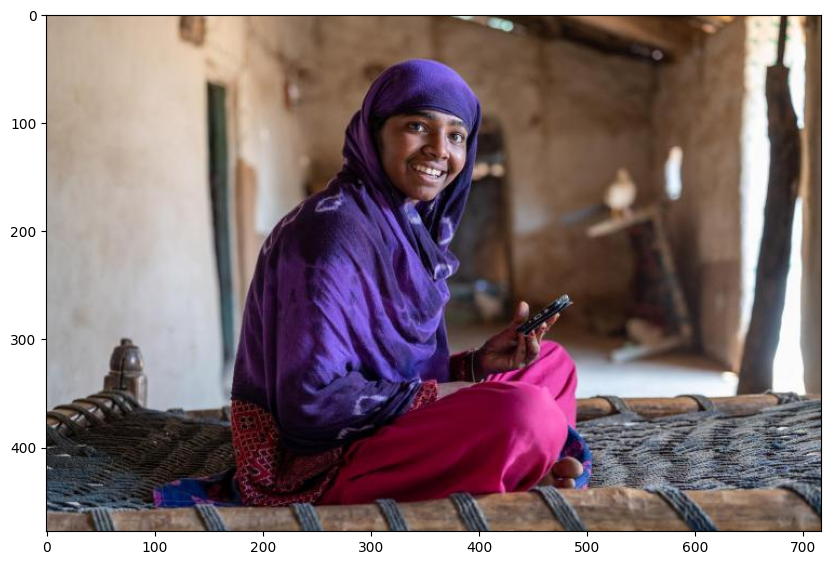

In [24]:
girl = cv2.imread('images/girl.jpg')
girl = cv2.cvtColor(girl,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(girl)
plt.axis('on')
plt.show()

In [25]:
predictor.set_image(girl)
input_points_g = np.array([[350,115]])
input_labels_g = np.array([1])

In [26]:
masks,scores,logits = predictor.predict(
    point_coords=input_points_g,
    point_labels=input_labels_g,
    multimask_output=True
)

[350]
[]


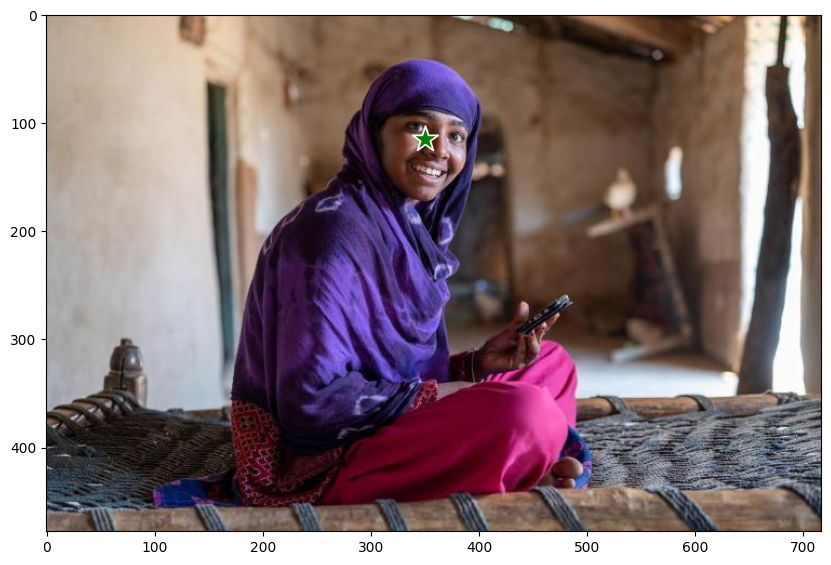

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(girl)
show_points(input_points_g, input_labels_g, plt.gca())
plt.axis('on')
plt.show()

In [28]:
for i ,(mask,score) in enumerate(zip(masks,scores)):
  plt.figure(figsize=(10,10))
  plt.imshow(girl)
  show_mask(mask,plt.gca())
  show_points(input_points_g, input_labels_g, plt.gca())
  plt.title(f'Mask = {i+1} , score= {score:.3f}')
  plt.axis('off')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [29]:
box_inputs_g = np.array([250,20,450,220])

In [30]:
masks,scores,logits = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=box_inputs_g[None,:],
    multimask_output=False
)

mask.reshape (478, 717, 1)
color.reshape (1, 1, 4)
mask_image (478, 717, 4)


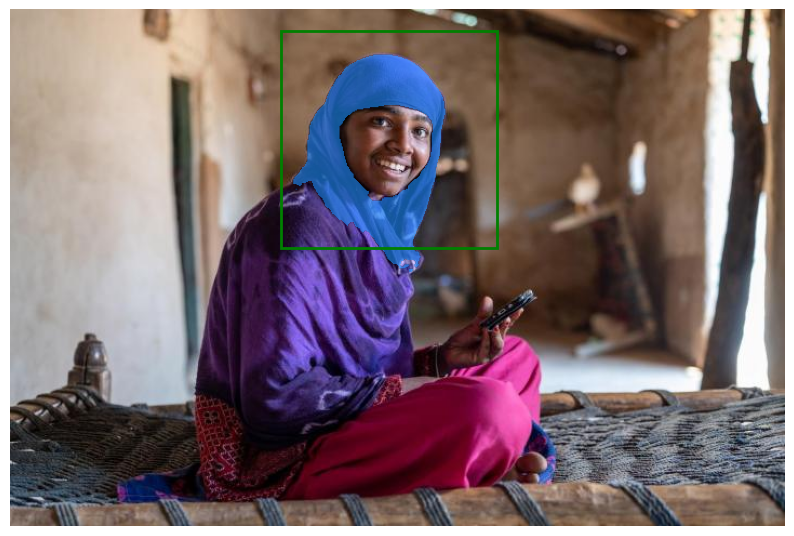

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(girl)
show_mask(masks,plt.gca())
show_box(box_inputs_g,plt.gca())
plt.axis('off')
plt.show()